## Количественный анализ модели Солоу с человеческим капиталом

### Импорт модулей

In [1]:
from typing import Callable, Tuple
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Метод Рунге-Кутта

In [2]:
def runge_kutta(fs: Tuple[Callable], n: int, h: float, t: float, x: float, y: float) -> Tuple[float, float, float]:
    """ Численный метод решения систем обыкновенных дифференциальных уравнений методом Рунге-Кутта
    
        :param fs: кортеж из первого и второго уравнений
        :type fs: Tuple[Callable]
        :param n: количество итераций (дней)
        :type n: int
        :param h: шаг
        :type h: float
        :param t: начальная точка `t`
        :type t: float
        :param x: начальная точка `x`
        :type x: float
        :param y: начальная точка `y`
        :type y: float
        
        :return: решение ДУ
        :rtype: Tuple[float, float, float]
    """
    def k(k1, k2, k3, k4):
            return (k1 + 2 * k2 + 2 * k3 + k4) / 6
    for _ in range(n):
        k11, k21 = map(lambda f: h * f(t, x, y), fs)
        k12, k22 = map(lambda f: h * f(t + h / 2, x + k11 / 2, y + k21 / 2), fs)
        k13, k23 = map(lambda f: h * f(t + h / 2, x + k12 / 2, y + k22 / 2), fs)
        k14, k24 = map(lambda f: h * f(t + h, x + k13, y + k23), fs)
        k1, k2 = k(k11, k12, k13, k14), k(k21, k22, k23, k24)
        t, x, y = t + h, x + k1, y + k2
    return t, x, y

In [3]:
def f(t, k, h, *,
      alpha=0.5, beta=0.2, sK=0.6, n=0.3, g=0.2, delta=0.01):
    y = (k**alpha) * (h**beta)
    return sK * y - (n + g + delta) * k

In [4]:
def g(t, k, h, *,
      alpha=0.5, beta=0.2, sH=0.9, n=0.3, g=0.2, delta=0.01):
    y = (k**alpha) * (h**beta)
    return sH * y - (n + g + delta) * h

In [5]:
runge_kutta((f, g), 1000, 0.01, 0, 7, 14)

(9.999999999999831, 3.0516210529145322, 4.598770192351719)

### График

In [6]:
time_list = np.linspace(1, 4000, 2000, dtype=int)
result_list = np.array([runge_kutta((f, g), time, 0.01, 0, 7, 14) for time in time_list])

In [7]:
x_points = result_list[:, 0]
k_points = result_list[:, 1]
h_points = result_list[:, 2]

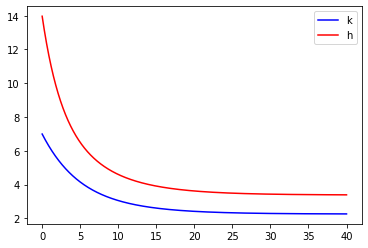

In [8]:
plt.plot(x_points, k_points, c='b', label="k")
plt.plot(x_points, h_points, c='r', label="h")
plt.legend()
plt.show()